In [23]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [24]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [27]:
X_train.shape

(60000, 28, 28)

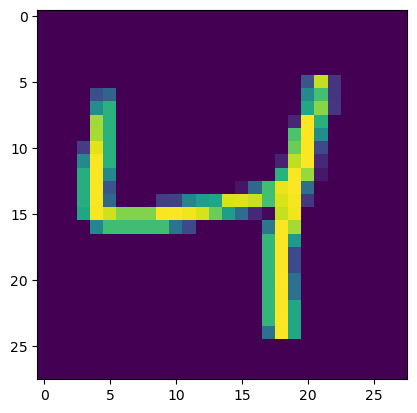

In [28]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [29]:
X_train=X_train/255
X_test=X_test/255

In [30]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [31]:
model=Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])

In [37]:
history=model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 12s 6ms/step - loss: 0.2933 - accuracy: 0.9142 - val_loss: 0.1514 - val_accuracy: 0.9562
Epoch 2/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1268 - accuracy: 0.9624 - val_loss: 0.1460 - val_accuracy: 0.9561
Epoch 3/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.1079 - val_accuracy: 0.9688
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0654 - accuracy: 0.9799 - val_loss: 0.0936 - val_accuracy: 0.9747
Epoch 5/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0508 - accuracy: 0.9838 - val_loss: 0.0888 - val_accuracy: 0.9750
Epoch 6/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.0966 - val_accuracy: 0.9713
Epoch 7/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0330 - accuracy: 0.9891 - val_loss: 0.1020 - val_accuracy

In [38]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [39]:
y_pred = y_prob.argmax(axis=1)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9741

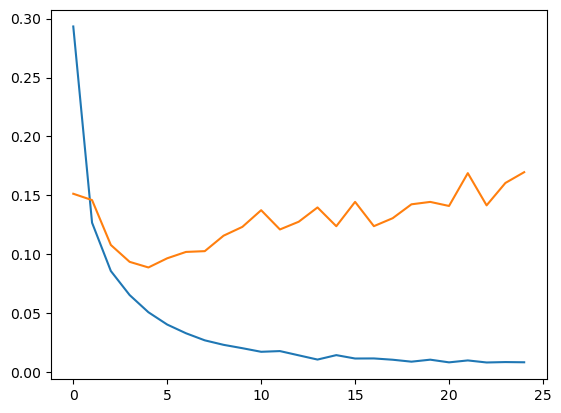

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

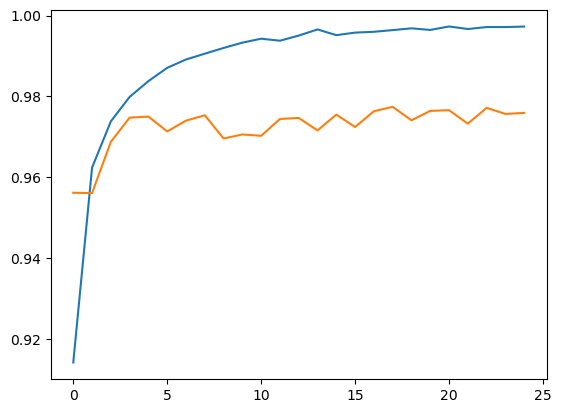

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

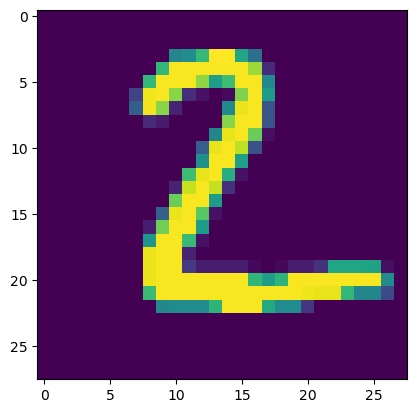

In [43]:
plt.imshow(X_test[1])

In [44]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 47ms/step


array([2], dtype=int64)